# 1)  IMAGE PREPARATION AND CLEANING

In [ ]:
# These steps involve:
# 1) Random extraction of images
# 2) Removing duplicate images if there is any after randomly extracting the images 

# 1) Random extraction of images from the three folders classes - bacterial blight, brownspot and leafsmut.
# it's essential to randomly extract certain amount of images from the folders cause processing a large amount of 
# images on a local computer will be computationally expensive and time consuming
# implemented a python code to randomly extract 200 images each from the folder classes totaling a sum of 600 images out of 4,684 images of the combined
# classes
# 2) removing duplicate images - after randomly extracting the 600 images, python code was implemented to clean and remove any duplicate images
# found amongst the extracted images

# 1A) RANDOM EXTRACTION OF IMAGES

In [22]:
import os
import random
import shutil

# Define folders paths containing images
folder_paths = {
    'Bacterialblight': r"C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\rice leaf diseases dataset\Bacterialblight",
    'Brownspot': r"C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\rice leaf diseases dataset\Brownspot",
    'Leafsmut': r"C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\rice leaf diseases dataset\Leafsmut"
}

# Create a main output folder to store the extracted image
main_output_folder = r"C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset"
os.makedirs(main_output_folder, exist_ok=True)

# Variable to store the total number of extracted images
total_extracted_images = 0

# Iterate over each class folder
for class_name, folder_path in folder_paths.items():
    
    num_initial_images = len(os.listdir(folder_path))
    print(f"Initial number of images in '{class_name}' folder: {num_initial_images}")
    
    
    class_output_folder = os.path.join(main_output_folder, class_name)
    os.makedirs(class_output_folder, exist_ok=True)
    
    
    num_images_to_extract = min(200, num_initial_images)
    
    
    images = os.listdir(folder_path)
    
    
    selected_images = random.sample(images, num_images_to_extract)
    
    
    for image_name in selected_images:
        source_path = os.path.join(folder_path, image_name)
        destination_path = os.path.join(class_output_folder, image_name)
        shutil.copyfile(source_path, destination_path)
    
    
    num_extracted_images = len(selected_images)
    print(f"Extracted {num_extracted_images} images from '{class_name}' folder.")
    
    
    total_extracted_images += num_extracted_images


print(f"Total number of images extracted in all: {total_extracted_images}")

Initial number of images in 'Bacterialblight' folder: 1604
Extracted 200 images from 'Bacterialblight' folder.
Initial number of images in 'Brownspot' folder: 1620
Extracted 200 images from 'Brownspot' folder.
Initial number of images in 'Leafsmut' folder: 1460
Extracted 200 images from 'Leafsmut' folder.
Total number of images extracted in all: 600


 # 1B) CHECKING DUPLICATE IMAGES

In [23]:
import os
import hashlib

def find_duplicate_images(root_dir):
    
    hash_dict = {}
    duplicate_count = 0

    
    for dataset_type in ['Bacterialblight', 'Brownspot', 'Leafsmut']:
        dataset_dir = os.path.join(root_dir, dataset_type)

    
        for image_name in os.listdir(dataset_dir):
            image_path = os.path.join(dataset_dir, image_name)

                
            if os.path.isfile(image_path):
                    
                with open(image_path, 'rb') as f:
                    image_hash = hashlib.md5(f.read()).hexdigest()

                    
                if image_hash in hash_dict:
                    print(f"Duplicate image found: {image_path}")
                    print(f"Original image path: {hash_dict[image_hash]}")
                    duplicate_count += 1
                else:
                    
                    hash_dict[image_hash] = image_path

    print(f"Total number of duplicate images found: {duplicate_count}")

#  NEW FOLDER DIRECTORY THAT WAS CREATED
root_directory = r"C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset"

find_duplicate_images(root_directory)

Duplicate image found: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT3_250.jpg
Original image path: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT3_212.jpg
Duplicate image found: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_162.jpg
Original image path: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_126.jpg
Duplicate image found: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_173.jpg
Original image path: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_089.jpg
Duplicate image found: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_186.jpg
Original ima

# 1C) REMOVING DUPLICATE IMAGES

In [25]:
import os
import hashlib

def remove_duplicate_images(root_dir):
    
    hash_dict = {}
    duplicate_count = 0

    
    for dataset_type in ['Bacterialblight', 'Brownspot', 'Leafsmut']:
        dataset_dir = os.path.join(root_dir, dataset_type)

    

            
        for image_name in os.listdir(dataset_dir):
            image_path = os.path.join(dataset_dir, image_name)

                
            if os.path.isfile(image_path):
                    
                with open(image_path, 'rb') as f:
                    image_hash = hashlib.md5(f.read()).hexdigest()

                    
                if image_hash in hash_dict:
                    print(f"Duplicate image found: {image_path}")
                    print(f"Original image path: {hash_dict[image_hash]}")
                        # Remove the duplicate image
                    os.remove(image_path)
                    duplicate_count += 1
                else:
                    
                    hash_dict[image_hash] = image_path

    print(f"Total number of duplicate images removed: {duplicate_count}")

# NEW FOLDER DIRECTORY THAT WAS CREATED
root_directory = r"C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset"
# call function to remove duplicate images
remove_duplicate_images(root_directory)

Duplicate image found: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT3_250.jpg
Original image path: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT3_212.jpg
Duplicate image found: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_162.jpg
Original image path: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_126.jpg
Duplicate image found: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_173.jpg
Original image path: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_089.jpg
Duplicate image found: C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset\Bacterialblight\BACTERAILBLIGHT4_186.jpg
Original ima

# 2) IMAGE PREPROCESSING

# 2A) RESIZING ALL IMAGES TO (100,100)

In [1]:
import os
import cv2
import numpy as np

def preprocess_image(folder_path):
    images = []
    labels = []
    for label, class_name in enumerate(['Bacterialblight', 'Brownspot', 'Leafsmut']):
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            img = cv2.imread(os.path.join(class_folder, filename))
            img = cv2.resize(img, (100, 100))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels) 

# NEW FOLDER DIRECTORY THAT WAS CREATED FOR IMAGE EXTRACTION
Folder_path = r"C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\New Rice Leaf Diseases Dataset"
images,labels = preprocess_image(Folder_path)

print(f'shape of images is {images.shape}')
print(f'shape of labels is {labels.shape}')

shape of images is (577, 100, 100, 3)
shape of labels is (577,)


# 3) FEATURE EXTRACTION

# 3A) COLOUR HISTOGRAM FEATURE

In [2]:
def extract_color_histograms(images):
    histograms = []
    for img in images:
        # Convert image to HSV color space
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        # Calculate histogram for each channel (Hue, Saturation, Value)
        h_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
        s_hist = cv2.calcHist([hsv], [1], None, [256], [0, 256])
        v_hist = cv2.calcHist([hsv], [2], None, [256], [0, 256])
        
        # Concatenate histograms into one feature vector
        histogram = np.concatenate((h_hist, s_hist, v_hist)).flatten()
        histograms.append(histogram)
    return np.array(histograms)

# Extract color histograms
images_histograms = extract_color_histograms(images)

# 4) ML ALGORITHMS TRAINING

# FEATURES AND LABELS TO BE TRAINED

In [3]:
# LABELS EXTRACTED FROM THE PREPROCESSING PART ABOVE
labels = labels
# COLOUR HISTOGRAM FEATURE EXTRACTED ABOVE
features = images_histograms
# Check features and labels shape
print(f'shape of features to be trained is {features.shape}')
print(f'shape of labels to be trained is {labels.shape}')

shape of features to be trained is (577, 768)
shape of labels to be trained is (577,)


# DATASET SPLITTING USING STRATIFIED K- FOLD CROSS VALIDATION(K = 10)

In [4]:
from sklearn.model_selection import StratifiedKFold
stratified_10_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_number = 1
for train_index, test_index in stratified_10_fold.split(features, labels):
    
    train_data_count = len(train_index)
    test_data_count = len(test_index)
    
    print(f"Fold {fold_number}:")
    print(f"Number of data points in training set: {train_data_count}")
    print(f"Number of data points in test set: {test_data_count}\n")
    
    fold_number += 1

Fold 1:
Number of data points in training set: 519
Number of data points in test set: 58

Fold 2:
Number of data points in training set: 519
Number of data points in test set: 58

Fold 3:
Number of data points in training set: 519
Number of data points in test set: 58

Fold 4:
Number of data points in training set: 519
Number of data points in test set: 58

Fold 5:
Number of data points in training set: 519
Number of data points in test set: 58

Fold 6:
Number of data points in training set: 519
Number of data points in test set: 58

Fold 7:
Number of data points in training set: 519
Number of data points in test set: 58

Fold 8:
Number of data points in training set: 520
Number of data points in test set: 57

Fold 9:
Number of data points in training set: 520
Number of data points in test set: 57

Fold 10:
Number of data points in training set: 520
Number of data points in test set: 57



# 4A) SUPPORT VECTOR MACHINE( WITH HYPERPARAMETER TUNING) USING COLOUR HISTOGRAM FEATURES

Best Hyperparameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy of fold1 = 0.9482758620689655
Accuracy of fold2 = 0.9655172413793104
Accuracy of fold3 = 0.9827586206896551
Accuracy of fold4 = 0.9482758620689655
Accuracy of fold5 = 1.0
Accuracy of fold6 = 0.9655172413793104
Accuracy of fold7 = 1.0
Accuracy of fold8 = 0.9649122807017544
Accuracy of fold9 = 1.0
Accuracy of fold10 = 0.9649122807017544
Mean Cross-Validation Score (Accuracy): 0.9740169388989717
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.98      0.97      0.98       196
      Brownspot       0.98      0.98      0.98       193
       Leafsmut       0.95      0.97      0.96       188

       accuracy                           0.97       577
      macro avg       0.97      0.97      0.97       577
   weighted avg       0.97      0.97      0.97       577

Confusion Matrix:
[[190   0   6]
 [  1 189   3]
 [  2   3 183]]


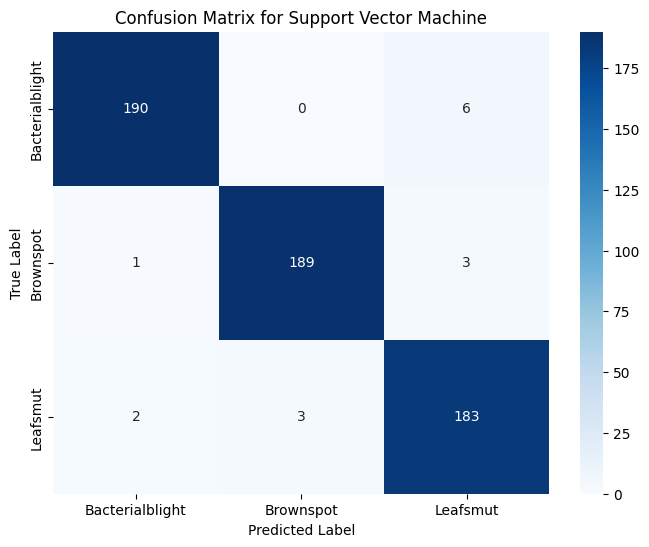

Sensitivity of Bacterialblight: 0.9921259842519685
Specificity of Bacterialblight: 0.9693877551020408
Sensitivity of Brownspot: 0.9921875
Specificity of Brownspot: 0.9792746113989638
Sensitivity of Leafsmut: 0.9768637532133676
Specificity of Leafsmut: 0.973404255319149
Cohen's Kappa: 0.9610045551004961


In [5]:
import numpy as np
import cv2
import os
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}




svm_classifier = SVC()


grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv= stratified_10_fold)
grid_search.fit(features, labels)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


svm_classifier_ = SVC(**best_params)


svm_classifier_.fit(features, labels)


# MODEL EVALUATION WITH 10 FOLD CROSS VALIDATION


y_pred = cross_val_predict(svm_classifier_, features, labels, cv = stratified_10_fold)


score = cross_val_score(svm_classifier_, features, labels, scoring='accuracy', cv= stratified_10_fold)
for index, value in enumerate(score):
    print(f'Accuracy of fold{index + 1} = {value}')
    

score = np.array(score)

meanscore = score.mean()
print("Mean Cross-Validation Score (Accuracy):", meanscore)


target_names = ['Bacterialblight', 'Brownspot', 'Leafsmut']  # Define target names
print("Classification Report:")
print(classification_report(labels, y_pred, target_names=target_names))


conf_mat = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_mat)


def plot_confusion_matrix(conf_mat, target_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Support Vector Machine')
    plt.show()

plot_confusion_matrix(conf_mat, target_names)


def calculate_specificity_sensitivity(conf_mat):
    specificity = []
    sensitivity = []
    for i in range(len(conf_mat)):
        tp = conf_mat[i, i]
        fn = np.sum(conf_mat[i, :]) - tp
        fp = np.sum(conf_mat[:, i]) - tp
        tn = np.sum(conf_mat) - tp - fn - fp
        specificity.append(tn / (tn + fp))
        sensitivity.append(tp / (tp + fn))
    return specificity, sensitivity
    
sensitivity, specificity = calculate_specificity_sensitivity(conf_mat)


for i, target_name in enumerate(target_names):
    print(f'Sensitivity of {target_name}: {sensitivity[i]}')
    print(f'Specificity of {target_name}: {specificity[i]}')



cohen_kappa = cohen_kappa_score(labels, y_pred)
print("Cohen's Kappa:", cohen_kappa)

# 4B) K- NEAREST NEIGHBOUR (WITH HYPERPARAMETER TUNING)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy of fold1 = 0.9310344827586207
Accuracy of fold2 = 0.9310344827586207
Accuracy of fold3 = 0.9482758620689655
Accuracy of fold4 = 0.9655172413793104
Accuracy of fold5 = 1.0
Accuracy of fold6 = 0.9655172413793104
Accuracy of fold7 = 0.9655172413793104
Accuracy of fold8 = 0.9824561403508771
Accuracy of fold9 = 0.9824561403508771
Accuracy of fold10 = 0.9649122807017544
Mean Cross-Validation Score (Accuracy): 0.9636721113127648
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.96      0.97      0.97       196
      Brownspot       0.99      0.95      0.97       193
       Leafsmut       0.94      0.97      0.96       188

       accuracy                           0.96       577
      macro avg       0.96      0.96      0.96       577
   weighted avg       0.96      0.96      0.96       577

Confusion Matrix:
[[190   0   6]
 [  4 183   6]
 [  3  

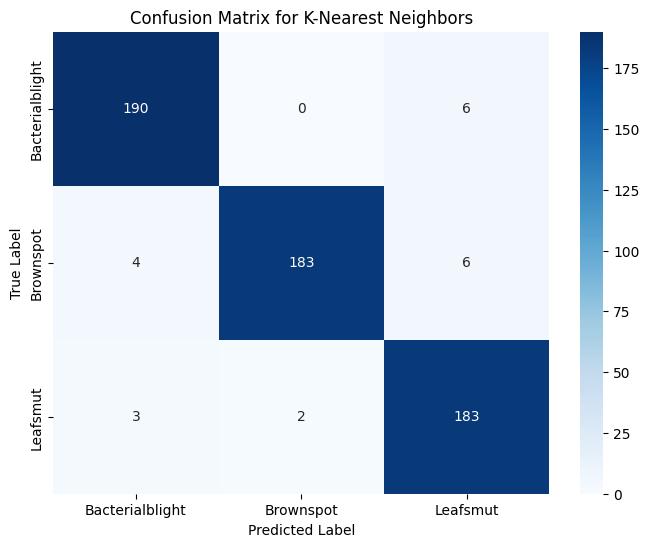

Sensitivity of Bacterialblight: 0.9693877551020408
Specificity of Bacterialblight: 0.9816272965879265
Sensitivity of Brownspot: 0.9481865284974094
Specificity of Brownspot: 0.9947916666666666
Sensitivity of Leafsmut: 0.973404255319149
Specificity of Leafsmut: 0.9691516709511568
Cohen's Kappa: 0.9454071150519031


In [6]:
import numpy as np
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns


param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}




knn_classifier = KNeighborsClassifier()


grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=stratified_10_fold)
grid_search.fit(features, labels)


best_params = grid_search.best_params_
mean_cv_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)


knn_classifier_ = KNeighborsClassifier(**best_params)


knn_classifier_.fit(features, labels)

# MODEL EVALUATION WITH 10 FOLD CROSS VALIDATION


y_pred = cross_val_predict(knn_classifier_, features, labels, cv=stratified_10_fold)


score = cross_val_score(knn_classifier_, features, labels, scoring='accuracy', cv=stratified_10_fold)
for index, value in enumerate(score):
    print(f'Accuracy of fold{index + 1} = {value}')


score = np.array(score)

meanscore = score.mean()
print("Mean Cross-Validation Score (Accuracy):", meanscore)


target_names = ['Bacterialblight', 'Brownspot', 'Leafsmut']
print("Classification Report:")
print(classification_report(labels, y_pred, target_names=target_names))


conf_mat = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_mat)


def plot_confusion_matrix(conf_mat, target_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for K-Nearest Neighbors')
    plt.show()

plot_confusion_matrix(conf_mat, target_names)


def calculate_specificity_sensitivity(conf_mat):
    sensitivity = []
    specificity = []
    for i in range(len(conf_mat)):
        tp = conf_mat[i, i]
        fn = np.sum(conf_mat[i, :]) - tp
        fp = np.sum(conf_mat[:, i]) - tp
        tn = np.sum(conf_mat) - tp - fn - fp
        specificity.append(tn / (tn + fp))
        sensitivity.append(tp / (tp + fn))
    return sensitivity, specificity

sensitivity, specificity = calculate_specificity_sensitivity(conf_mat)


for i, target_name in enumerate(target_names):
    print(f'Sensitivity of {target_name}: {sensitivity[i]}')
    print(f'Specificity of {target_name}: {specificity[i]}')


cohen_kappa = cohen_kappa_score(labels, y_pred)
print("Cohen's Kappa:", cohen_kappa)

# 4C)  RANDOM FOREST (WITH HYPERPARAMETER TUNING)

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 150}
Accuracy of fold1 = 0.9655172413793104
Accuracy of fold2 = 0.9482758620689655
Accuracy of fold3 = 0.9655172413793104
Accuracy of fold4 = 0.9310344827586207
Accuracy of fold5 = 0.9655172413793104
Accuracy of fold6 = 0.9482758620689655
Accuracy of fold7 = 0.9655172413793104
Accuracy of fold8 = 0.9824561403508771
Accuracy of fold9 = 0.9824561403508771
Accuracy of fold10 = 0.9298245614035088
Mean Cross-Validation Score (Accuracy): 0.9584392014519055
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.98      0.96      0.97       196
      Brownspot       0.96      0.98      0.97       193
       Leafsmut       0.95      0.95      0.95       188

       accuracy                           0.97       577
      macro avg       0.97      0.97      0.97       577
   weighted avg       0.97      0.97      0.97       577

Confusion Matrix:
[[189   0   7]
 [  1 190   2]
 [  3   7 178]]


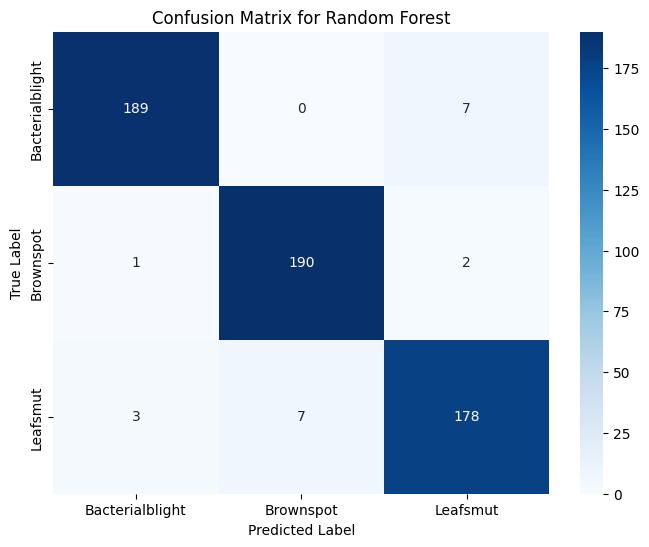

Sensitivity of Bacterialblight: 0.989501312335958
Specificity of Bacterialblight: 0.9642857142857143
Sensitivity of Brownspot: 0.9817708333333334
Specificity of Brownspot: 0.9844559585492227
Sensitivity of Leafsmut: 0.9768637532133676
Specificity of Leafsmut: 0.9468085106382979
Cohen's Kappa: 0.9480002162902615


In [7]:
import numpy as np
import cv2
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}



# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv= stratified_10_fold)
grid_search.fit(features, labels)

# Best hyperparameters and cross-validation score
best_params = grid_search.best_params_
mean_cv_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)


rf_classifier_ = RandomForestClassifier(**best_params)


rf_classifier_.fit(features, labels)




y_pred = cross_val_predict(rf_classifier_, features, labels, cv= stratified_10_fold)


score = cross_val_score(rf_classifier_, features, labels, scoring='accuracy', cv= stratified_10_fold)
for index, value in enumerate(score):
    print(f'Accuracy of fold{index + 1} = {value}')


score = np.array(score)

meanscore = score.mean()
print("Mean Cross-Validation Score (Accuracy):", meanscore)


target_names = ['Bacterialblight', 'Brownspot', 'Leafsmut']  
print("Classification Report:")
print(classification_report(labels, y_pred, target_names=target_names))


conf_mat = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_mat)


def plot_confusion_matrix(conf_mat, target_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Random Forest')
    plt.show()

plot_confusion_matrix(conf_mat, target_names)


def calculate_specificity_sensitivity(conf_mat):
    specificity = []
    sensitivity = []
    for i in range(len(conf_mat)):
        tp = conf_mat[i, i]
        fn = np.sum(conf_mat[i, :]) - tp
        fp = np.sum(conf_mat[:, i]) - tp
        tn = np.sum(conf_mat) - tp - fn - fp
        specificity.append(tn / (tn + fp))
        sensitivity.append(tp / (tp + fn))
    return specificity, sensitivity

sensitivity, specificity = calculate_specificity_sensitivity(conf_mat)


for i, target_name in enumerate(target_names):
    print(f'Sensitivity of {target_name}: {sensitivity[i]}')
    print(f'Specificity of {target_name}: {specificity[i]}')
 

cohen_kappa = cohen_kappa_score(labels, y_pred)
print("Cohen's Kappa:", cohen_kappa)

# 4D) LOGISTIC REGRESSION (WITH HYPERPARAMETER TUNING)

Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy of fold1 = 0.9137931034482759
Accuracy of fold2 = 0.9655172413793104
Accuracy of fold3 = 0.9655172413793104
Accuracy of fold4 = 0.9310344827586207
Accuracy of fold5 = 1.0
Accuracy of fold6 = 0.9655172413793104
Accuracy of fold7 = 0.9655172413793104
Accuracy of fold8 = 0.9649122807017544
Accuracy of fold9 = 1.0
Accuracy of fold10 = 0.9824561403508771
Mean Cross-Validation Score (Accuracy): 0.9654264972776769
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.96      0.98      0.97       196
      Brownspot       0.98      0.96      0.97       193
       Leafsmut       0.96      0.95      0.95       188

       accuracy                           0.97       577
      macro avg       0.97      0.97      0.97       577
   weighted avg       0.97      0.97      0.97       577

Confusion Matrix:
[[193   0   3]
 [  3 186   4]
 [  6   4 178]]


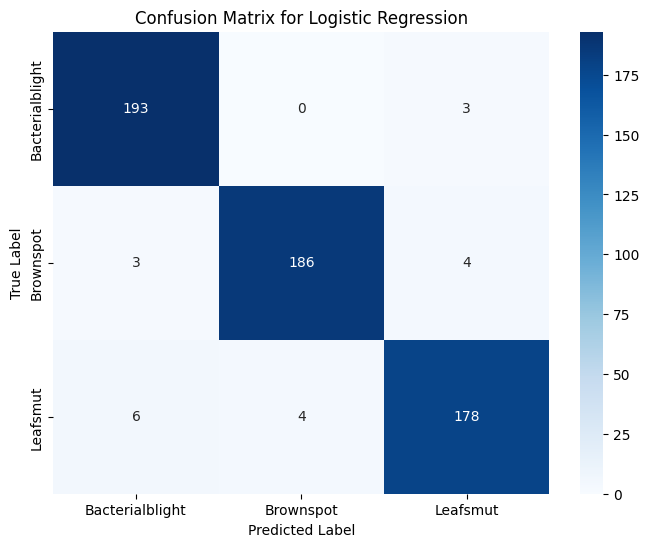

Sensitivity of Bacterialblight: 0.9763779527559056
Specificity of Bacterialblight: 0.9846938775510204
Sensitivity of Brownspot: 0.9895833333333334
Specificity of Brownspot: 0.9637305699481865
Sensitivity of Leafsmut: 0.9820051413881749
Specificity of Leafsmut: 0.9468085106382979
Cohen's Kappa: 0.9479915452460036


In [8]:
import numpy as np
import cv2
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns


param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga']
}




logreg_classifier = LogisticRegression(max_iter = 10000)


grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv= stratified_10_fold)
grid_search.fit(features, labels)


best_params = grid_search.best_params_
mean_cv_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)


logreg_classifier_ = LogisticRegression(**best_params)


logreg_classifier_.fit(features, labels)




y_pred = cross_val_predict(logreg_classifier_, features, labels, cv= stratified_10_fold)


score = cross_val_score(logreg_classifier_, features, labels, scoring='accuracy', cv= stratified_10_fold)
for index, value in enumerate(score):
    print(f'Accuracy of fold{index + 1} = {value}')


score = np.array(score)

meanscore = score.mean()
print("Mean Cross-Validation Score (Accuracy):", meanscore)


target_names = ['Bacterialblight', 'Brownspot', 'Leafsmut']  
print("Classification Report:")
print(classification_report(labels, y_pred, target_names=target_names))


conf_mat = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(conf_mat)


def plot_confusion_matrix(conf_mat, target_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Logistic Regression')
    plt.show()

plot_confusion_matrix(conf_mat, target_names)


def calculate_specificity_sensitivity(conf_mat):
    specificity = []
    sensitivity = []
    for i in range(len(conf_mat)):
        tp = conf_mat[i, i]
        fn = np.sum(conf_mat[i, :]) - tp
        fp = np.sum(conf_mat[:, i]) - tp
        tn = np.sum(conf_mat) - tp - fn - fp
        specificity.append(tn / (tn + fp))
        sensitivity.append(tp / (tp + fn))
    return specificity, sensitivity

sensitivity, specificity = calculate_specificity_sensitivity(conf_mat)


for i, target_name in enumerate(target_names):
    print(f'Sensitivity of {target_name}: {sensitivity[i]}')
    print(f'Specificity of {target_name}: {specificity[i]}')


cohen_kappa = cohen_kappa_score(labels, y_pred)
print("Cohen's Kappa:", cohen_kappa)

# 4E) FULLY CONNECTED NEURAL NETWORK (WITH HYPERPARAMETER TUNING)

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Accuracy of fold1 = 0.9655172413793104
Accuracy of fold2 = 0.9655172413793104
Accuracy of fold3 = 0.9655172413793104
Accuracy of fold4 = 0.9482758620689655
Accuracy of fold5 = 1.0
Accuracy of fold6 = 0.9655172413793104
Accuracy of fold7 = 0.9827586206896551
Accuracy of fold8 = 0.9824561403508771
Accuracy of fold9 = 1.0
Accuracy of fold10 = 0.9473684210526315
Mean Cross-validation Score: 0.9722928009679371
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.99      0.99      0.99       196
      Brownspot       0.99      1.00      1.00       193
       Leafsmut       0.99      0.99      0.99       188

       accuracy                           0.99       577
      macro avg       0.99      0.99      0.99       577
   weighted avg       0.99      0.99      0.99       577

Confusion Matrix:
[[195   0   1]
 [  0 193   0]
 [  1

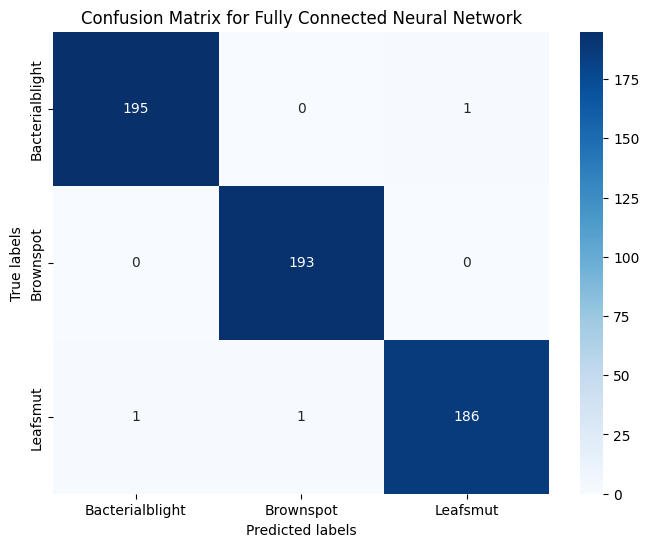

Sensitivity (Bacterialblight): 0.9948979591836735
Specificity (Bacterialblight): 0.9973753280839895
Sensitivity (Brownspot): 1.0
Specificity (Brownspot): 0.9973958333333334
Sensitivity (Leafsmut): 0.9893617021276596
Specificity (Leafsmut): 0.9974293059125964
Cohen's Kappa: 0.9921997161075187


In [80]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt



mlp = MLPClassifier(max_iter = 1000)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_search = GridSearchCV(mlp, param_grid, cv=stratified_10_fold)
grid_search.fit(features, labels)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)



mlp_best = MLPClassifier(**best_params, random_state = 42)
accuracies = []

for train_index, test_index in stratified_10_fold.split(features, labels):
    features_train, features_test = features[train_index], features[test_index]
    labels_train, labels_test = labels[train_index], labels[test_index]
    
    mlp_best.fit(features_train, labels_train)
    labels_pred = mlp_best.predict(features_test)
    accuracy = accuracy_score(labels_test, labels_pred)
    accuracies.append(accuracy)
    
for index, value in enumerate(accuracies):
    print(f'Accuracy of fold{index + 1} = {value}')

mean_accuracy = np.mean(accuracies)
print("Mean Cross-validation Score:", mean_accuracy)


target_names = ['Bacterialblight', 'Brownspot', 'Leafsmut']
y_pred_all = mlp_best.predict(features)
print("Classification Report:")
print(classification_report(labels, y_pred_all, target_names=target_names))


conf_matrix = confusion_matrix(labels, y_pred_all)
print("Confusion Matrix:")
print(conf_matrix)



plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bacterialblight', 'Brownspot', 'Leafsmut'], yticklabels=['Bacterialblight', 'Brownspot', 'Leafsmut'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Fully Connected Neural Network')
plt.show()


def sensitivity_specificity(conf_matrix, label_index):
    true_positives = conf_matrix[label_index, label_index]
    false_positives = np.sum(conf_matrix[:, label_index]) - true_positives
    true_negatives = np.sum(conf_matrix) - np.sum(conf_matrix[label_index, :]) - np.sum(conf_matrix[:, label_index]) + true_positives
    false_negatives = np.sum(conf_matrix[label_index, :]) - true_positives
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    return sensitivity, specificity

sensitivity_b, specificity_b = sensitivity_specificity(conf_matrix, 0) 
sensitivity_br, specificity_br = sensitivity_specificity(conf_matrix, 1) 
sensitivity_ls, specificity_ls = sensitivity_specificity(conf_matrix, 2) 

print("Sensitivity (Bacterialblight):", sensitivity_b)
print("Specificity (Bacterialblight):", specificity_b)
print("Sensitivity (Brownspot):", sensitivity_br)
print("Specificity (Brownspot):", specificity_br)
print("Sensitivity (Leafsmut):", sensitivity_ls)
print("Specificity (Leafsmut):", specificity_ls)


kappa = cohen_kappa_score(labels, y_pred_all)
print("Cohen's Kappa:", kappa)

# 4F) CONVOLUTIONAL NEURAL NETWORK (WITH HYPERPARAMETER TUNING)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Accuracy for fold 1: 0.8275862068965517
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Accuracy for fold 2: 0.9827586206896551
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Accuracy for fold 3: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Accuracy for fold 4: 0.9827586206896551
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Accuracy for fold 5: 0.9827586206896551
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Accuracy for fold 6: 0.9827586206896551
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Accuracy for fold 7: 0.9655172413793104
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Accuracy for fold 8: 0.9473684210526315
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Accuracy for fold 9: 0.9824561403508771
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Accuracy for fold 10: 0.8947368421052632
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Accuracy for fold 1: 0.9655172413793104
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Accuracy for fold 2: 0.9827586206896551
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Accuracy for fold 3: 0.96551

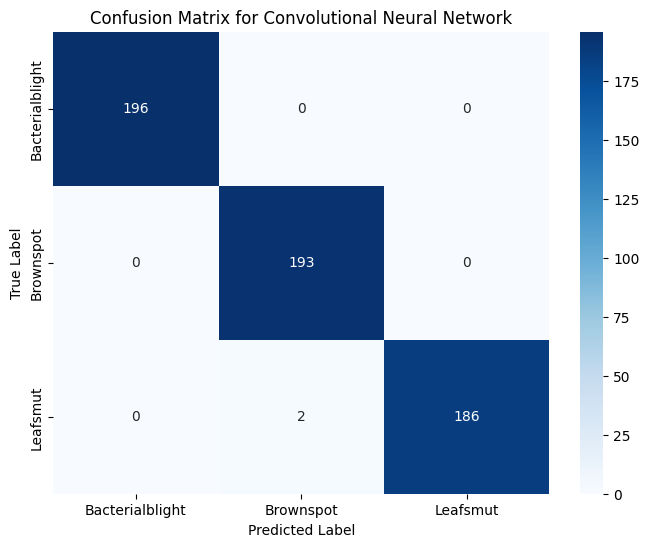

Cohen's Kappa: 0.9947996935694651


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def create_model(activation='relu', batch_size=32, epochs=10):
    model = Sequential()
    model.add(Input(shape=(features.shape[1],)))
    model.add(Dense(32, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(128, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


skf = KFold(n_splits=10, shuffle=True, random_state=42)


param_grid = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'batch_size': [32, 64],
    'epochs': [10, 20, 30]
}


best_accuracy = 0
best_params = {}


for activation in param_grid['activation']:
    for batch_size in param_grid['batch_size']:
        for epochs in param_grid['epochs']:
            accuracy_scores = []  
            
            for fold, (train_idx, test_idx) in enumerate(skf.split(features, labels), 1):
                X_train, X_test = features[train_idx], features[test_idx]
                y_train, y_test = labels[train_idx], labels[test_idx]

                
                model = create_model(activation=activation, batch_size=batch_size, epochs=epochs)
                
                
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                
                
                y_pred = np.argmax(model.predict(X_test), axis=1)
                
                
                accuracy = accuracy_score(y_test, y_pred)
                accuracy_scores.append(accuracy)
                print(f"Accuracy for fold {fold}: {accuracy}")
            
            
            mean_accuracy = np.mean(accuracy_scores)
            
            
            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_params = {'activation': activation, 'batch_size': batch_size, 'epochs': epochs}


print("Best Hyperparameters tuned:", best_params)


final_model = create_model(activation=best_params['activation'], batch_size=best_params['batch_size'], epochs=best_params['epochs'])


all_predictions = []
all_true_labels = []
fold_accuracies = []


for fold, (train_idx, test_idx) in enumerate(skf.split(features, labels), 1):
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]

    
    final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
    
    
    y_pred = np.argmax(final_model.predict(X_test), axis=1)
    
    
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

    
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(fold_accuracy)

    print(f"Accuracy for fold {fold}: {fold_accuracy}")


print("Average Accuracy Across Folds:", np.mean(fold_accuracies))


conf_matrix = confusion_matrix(all_true_labels, all_predictions)
TP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - TP
FN = conf_matrix.sum(axis=1) - TP
TN = conf_matrix.sum() - (TP + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)


class_names = ['Bacterialblight', 'Brownspot', 'Leafsmut']
for i, (sens, spec) in enumerate(zip(sensitivity, specificity)):
    print(f"{class_names[i]}: Sensitivity = {sens}, Specificity = {spec}")


print("Classification Report:")
print(classification_report(all_true_labels, all_predictions, target_names=class_names))


print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Convolutional Neural Network')
plt.show()


print("Cohen's Kappa:", cohen_kappa_score(all_true_labels, all_predictions))